In [58]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sys.path.append(os.path.abspath(".."))  
from src.graficos import criar_boxplot, criar_scatterplot_outliers, criar_barplot_stacked, criar_pieplot

In [4]:
data = pd.read_csv("../data/cleaned.csv")

In [5]:
data

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
2,2025-05-03,sábado,80,90,539,360,66.79,83,15.40,96,17.81,12,4
3,2025-05-04,domingo,77,95,515,338,65.63,72,13.98,105,20.39,29,4
4,2025-05-05,segunda-feira,85,89,428,258,60.28,72,16.82,98,22.90,15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2025-07-08,terça-feira,78,71,519,338,65.13,63,12.14,118,22.74,8,3
69,2025-07-09,quarta-feira,82,75,505,358,70.89,73,14.46,74,14.65,5,3
70,2025-07-10,quinta-feira,76,74,472,324,68.64,58,12.29,90,19.07,4,2
71,2025-07-11,sexta-feira,85,77,483,309,63.98,76,15.73,98,20.29,9,2


Criação de lista "Métricas"

In [6]:
metricas = ["pontuacao","regularidade", 
            "duracao", "sono_leve","sono_leve_perc", 
            "sono_profundo", "sono_profundo_perc", "REM", "REM_perc", 
            "tempo_acordado", "vezes_acordado"]

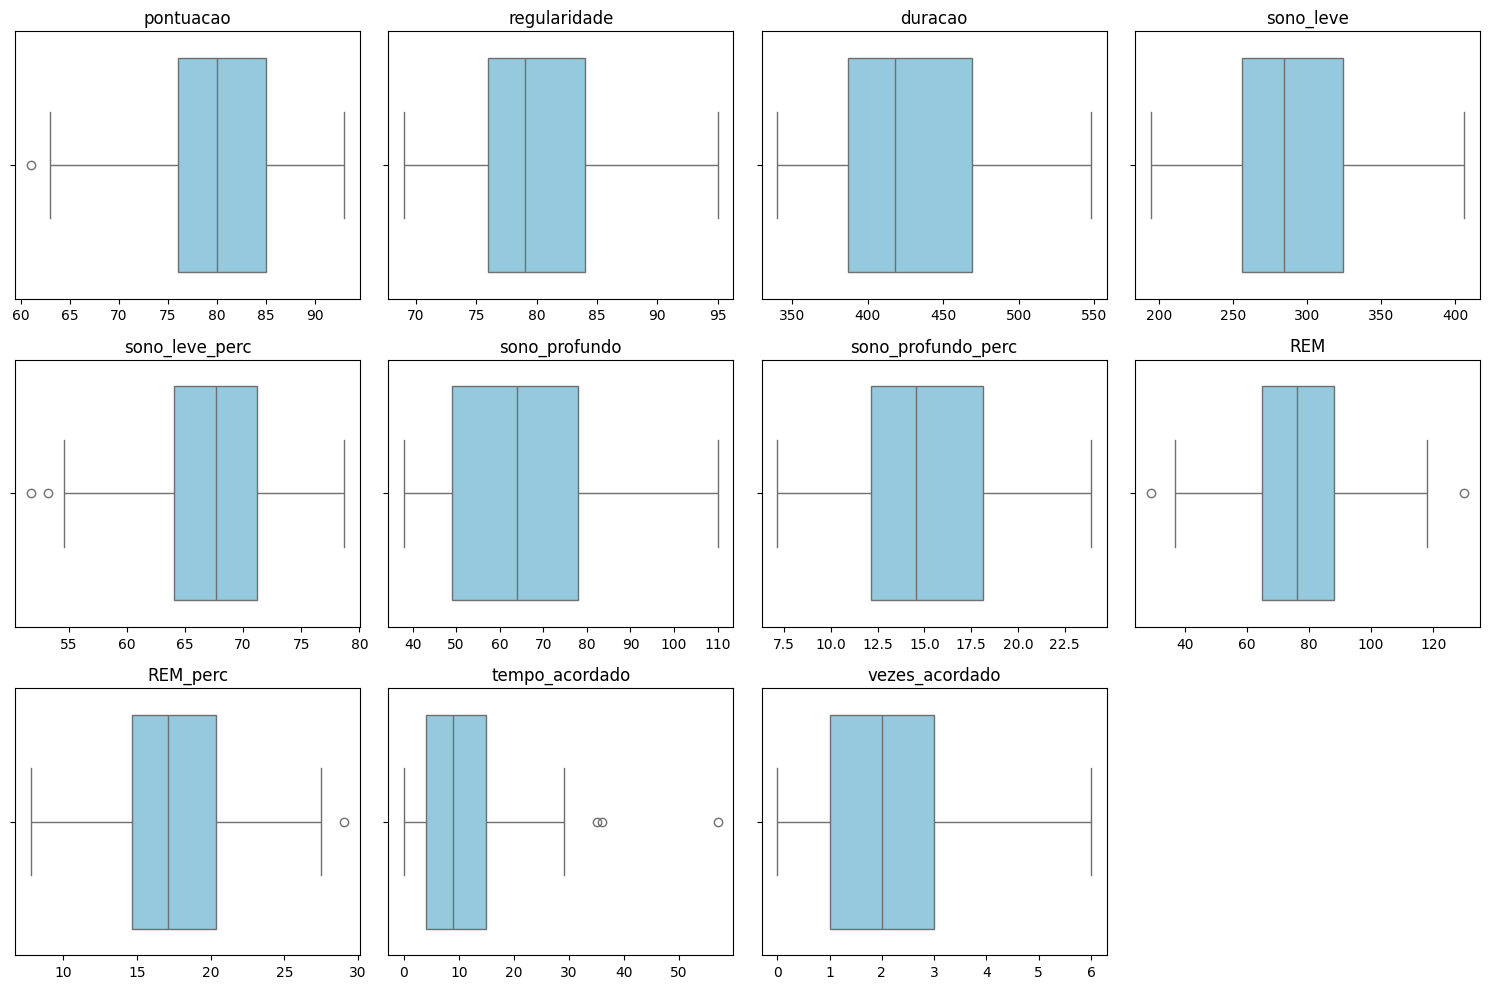

(<Figure size 1500x1000 with 11 Axes>,
 array([<Axes: title={'center': 'pontuacao'}>,
        <Axes: title={'center': 'regularidade'}>,
        <Axes: title={'center': 'duracao'}>,
        <Axes: title={'center': 'sono_leve'}>,
        <Axes: title={'center': 'sono_leve_perc'}>,
        <Axes: title={'center': 'sono_profundo'}>,
        <Axes: title={'center': 'sono_profundo_perc'}>,
        <Axes: title={'center': 'REM'}>,
        <Axes: title={'center': 'REM_perc'}>,
        <Axes: title={'center': 'tempo_acordado'}>,
        <Axes: title={'center': 'vezes_acordado'}>, <Axes: >], dtype=object))

In [7]:
criar_boxplot(dataframe=data, metricas=metricas)

In [8]:
outliers = ["pontuacao", "sono_leve_perc", "REM", "REM_perc", "tempo_acordado"]

Visualização de outliers 

Utilização de Scater Plot para visualizar dados

Utilização de Line Plot para visualizar Linha Inferior, Linha Superior e Média


Análise de Outliers - pontuacao
• Primeiro Quartil (Q1): 76.00
• Terceiro Quartil (Q3): 85.00
• IQR: 9.00
• Limite Inferior: 62.50
• Limite Superior: 98.50
• Outliers Detected: 1


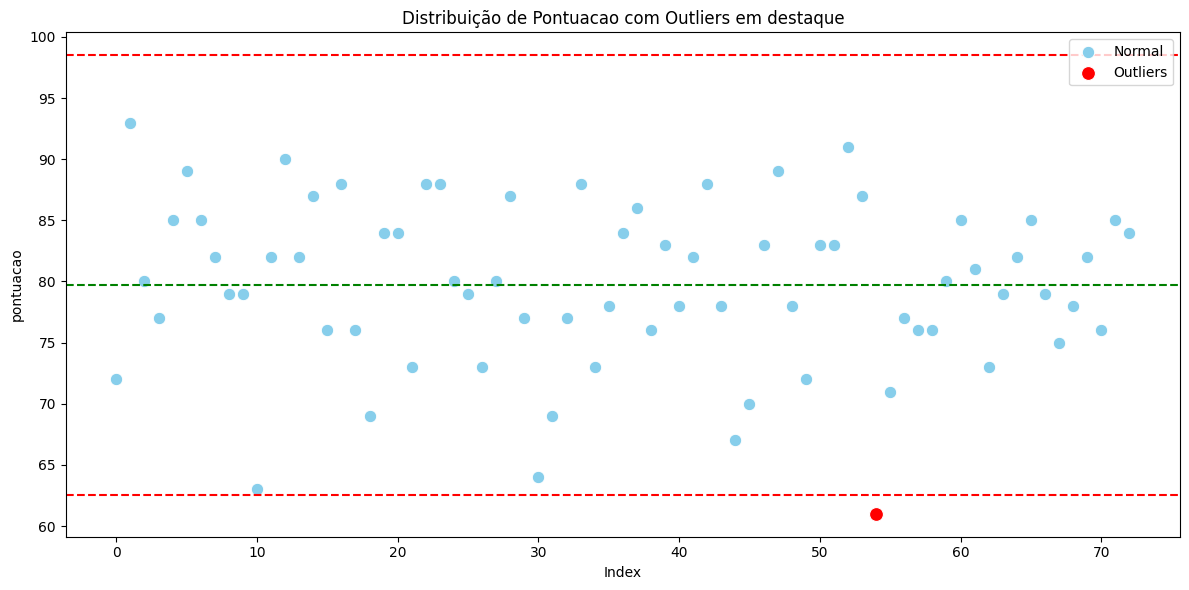


Análise de Outliers - sono_leve_perc
• Primeiro Quartil (Q1): 64.09
• Terceiro Quartil (Q3): 71.18
• IQR: 7.09
• Limite Inferior: 53.45
• Limite Superior: 81.82
• Outliers Detected: 2


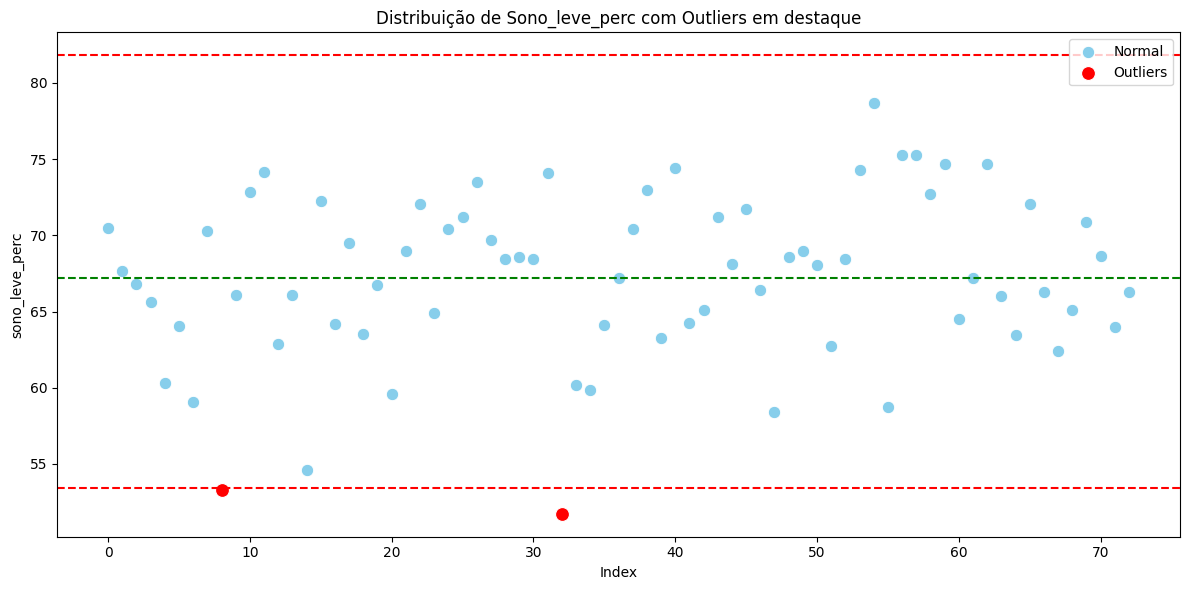


Análise de Outliers - REM
• Primeiro Quartil (Q1): 65.00
• Terceiro Quartil (Q3): 88.00
• IQR: 23.00
• Limite Inferior: 30.50
• Limite Superior: 122.50
• Outliers Detected: 2


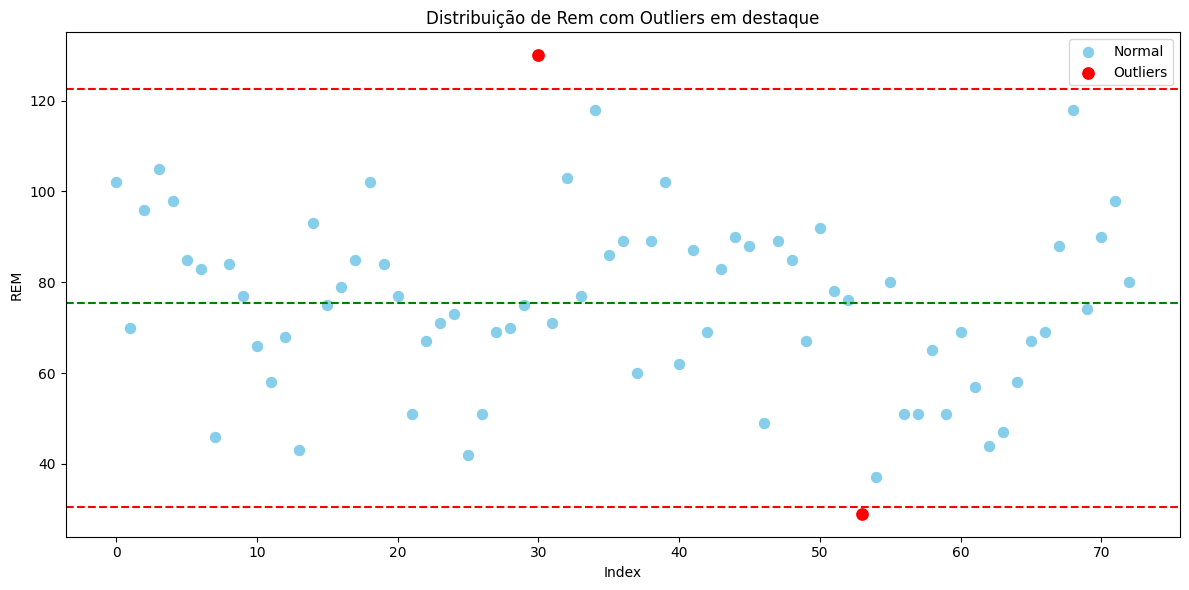


Análise de Outliers - REM_perc
• Primeiro Quartil (Q1): 14.66
• Terceiro Quartil (Q3): 20.34
• IQR: 5.68
• Limite Inferior: 6.14
• Limite Superior: 28.86
• Outliers Detected: 1


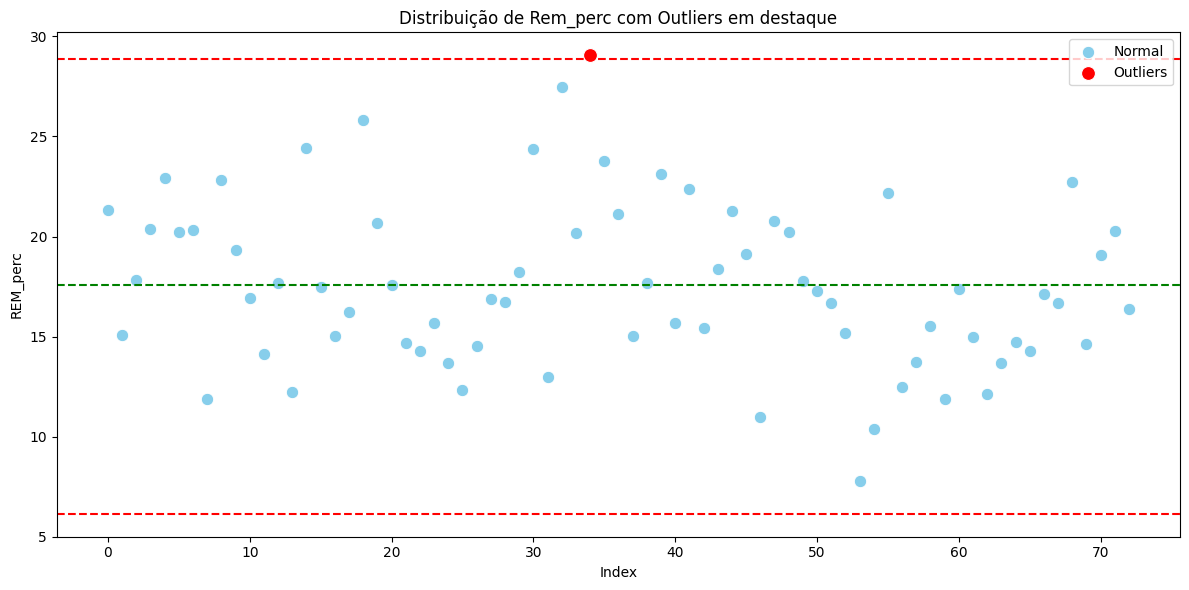


Análise de Outliers - tempo_acordado
• Primeiro Quartil (Q1): 4.00
• Terceiro Quartil (Q3): 15.00
• IQR: 11.00
• Limite Inferior: -12.50
• Limite Superior: 31.50
• Outliers Detected: 3


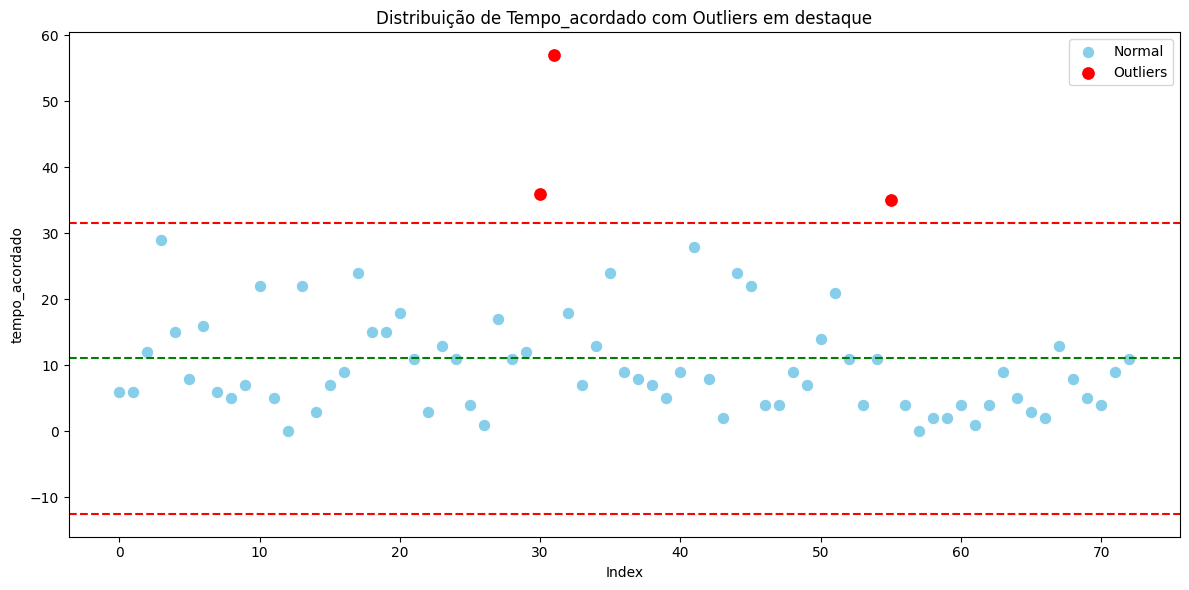

In [9]:
criar_scatterplot_outliers(outliers=outliers, dataframe=data)

Visualização de Histogramas

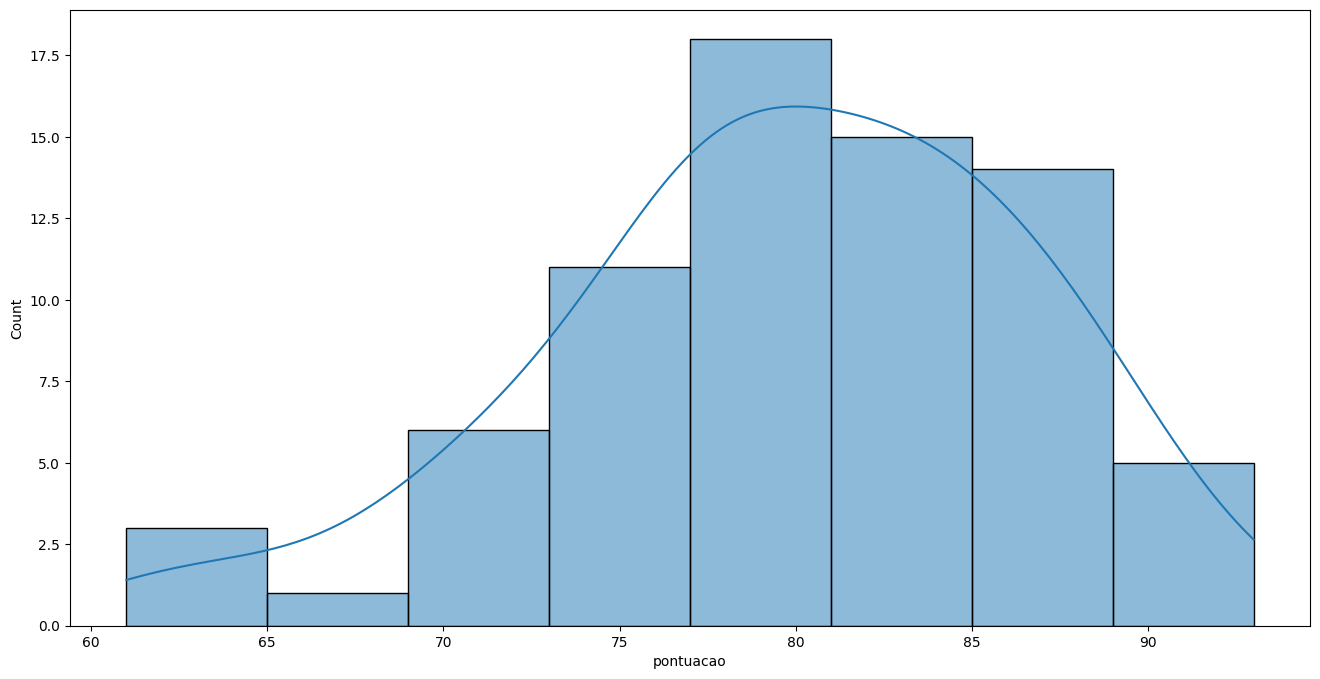

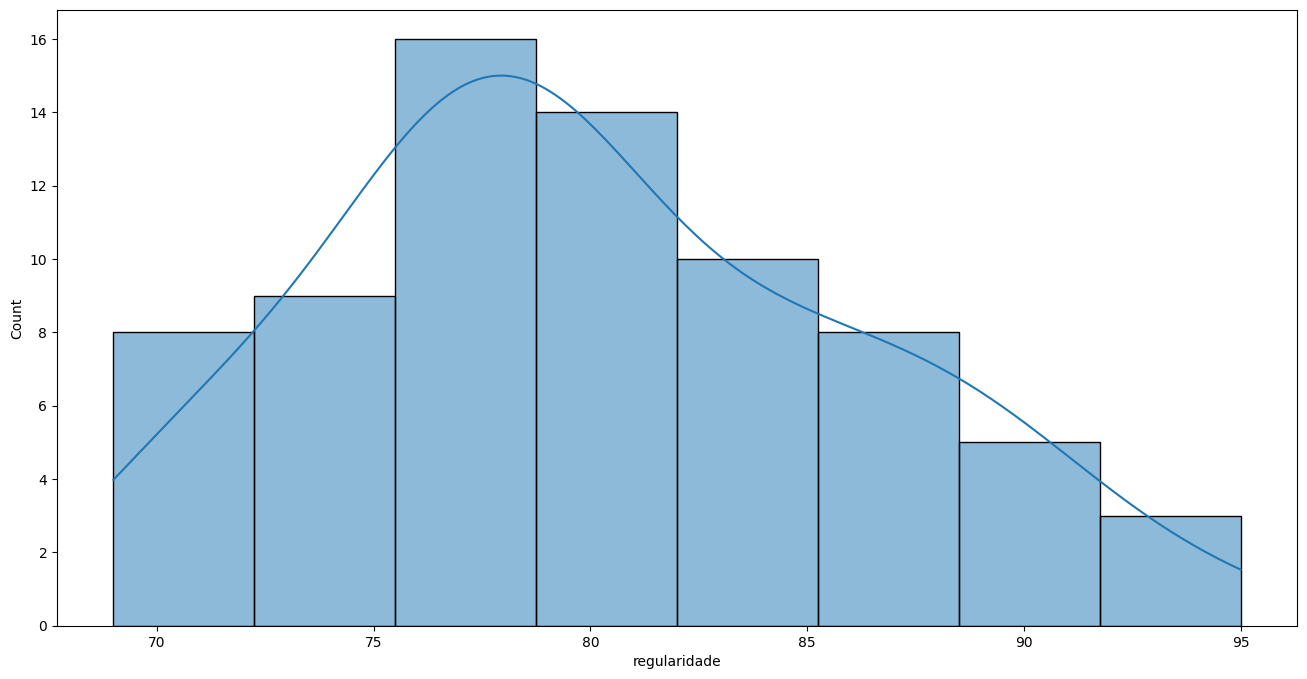

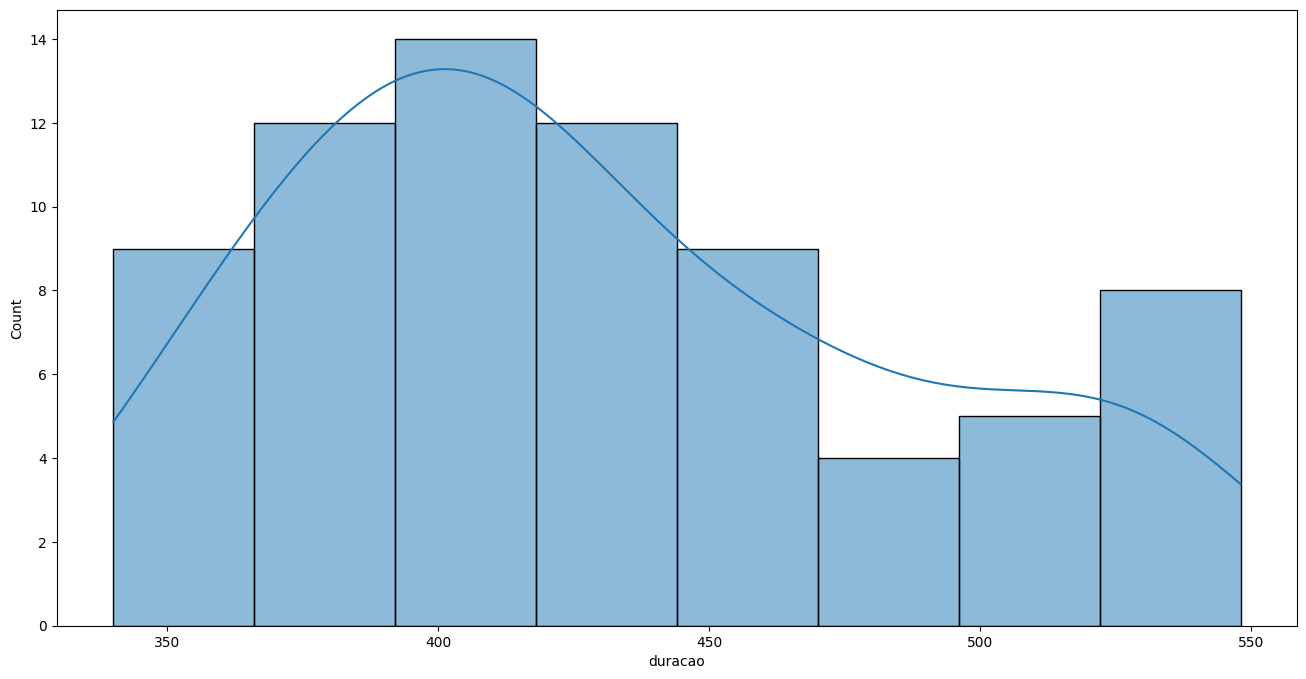

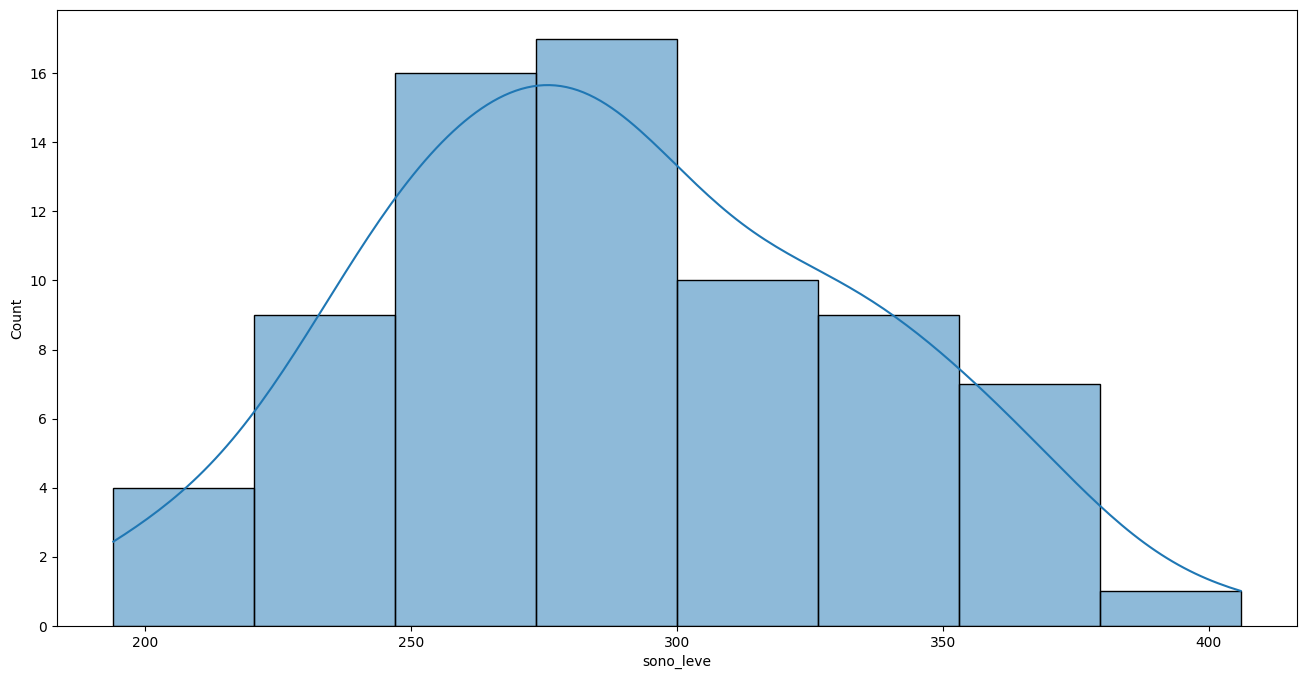

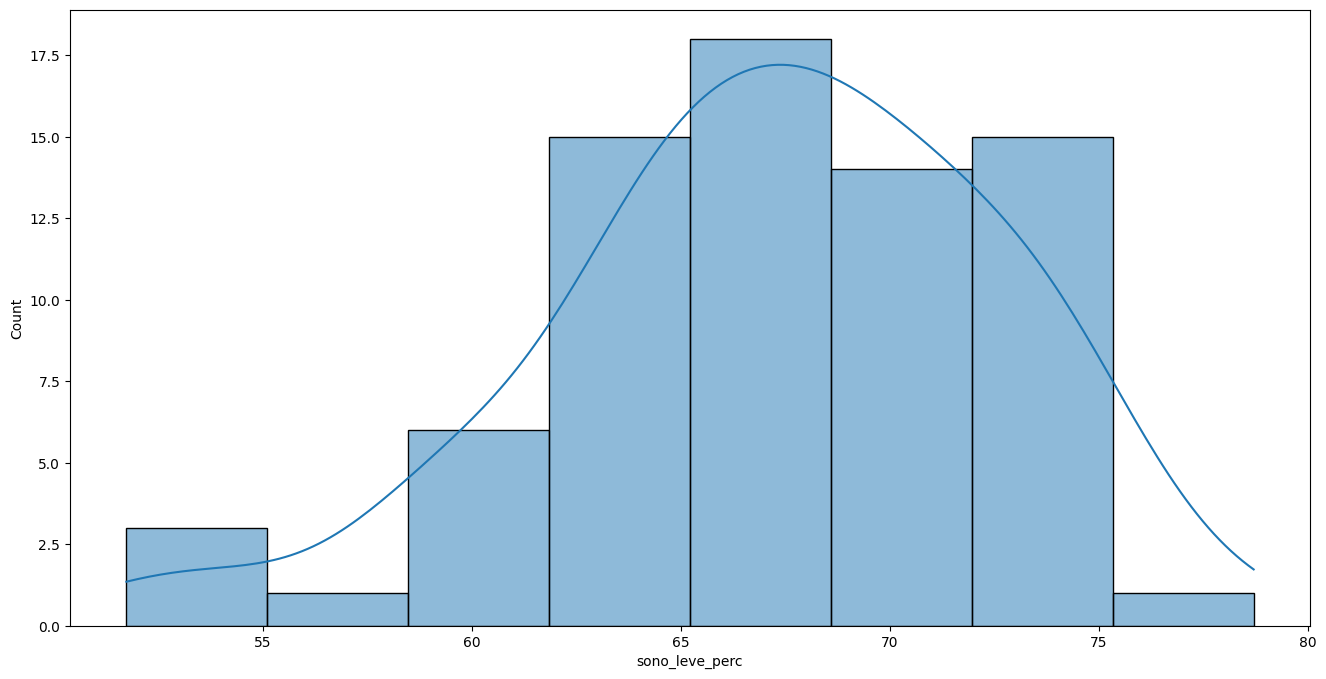

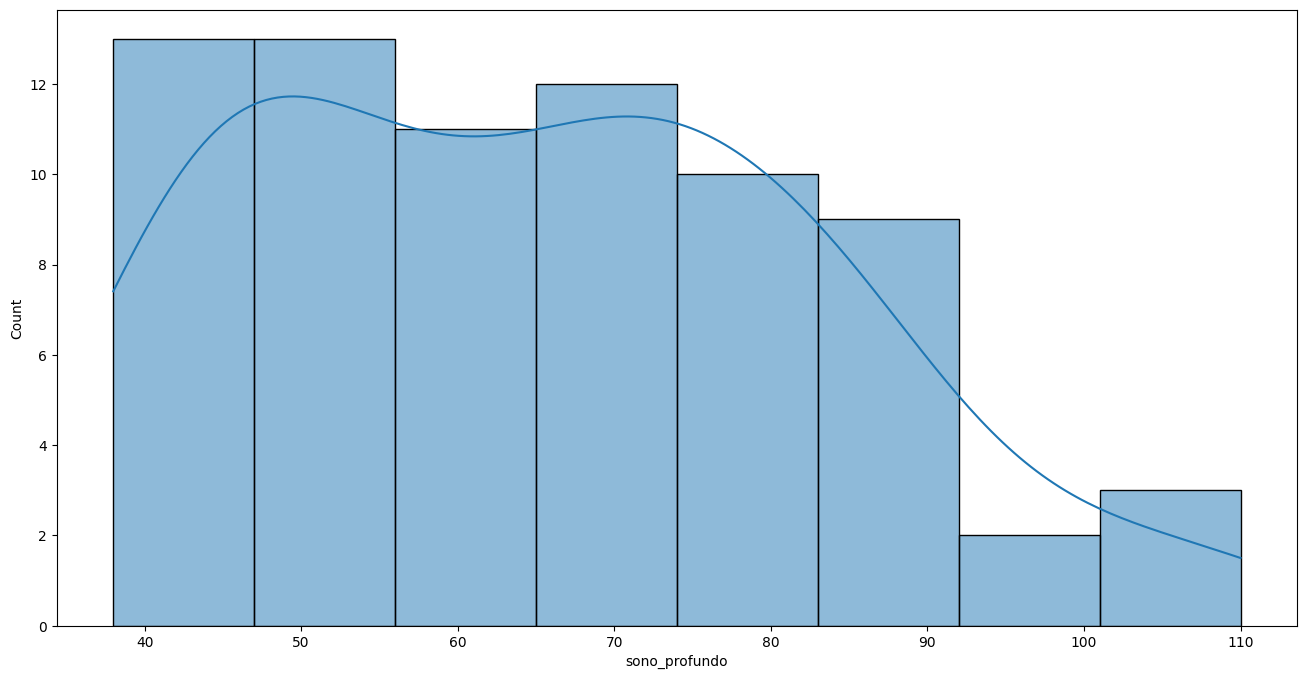

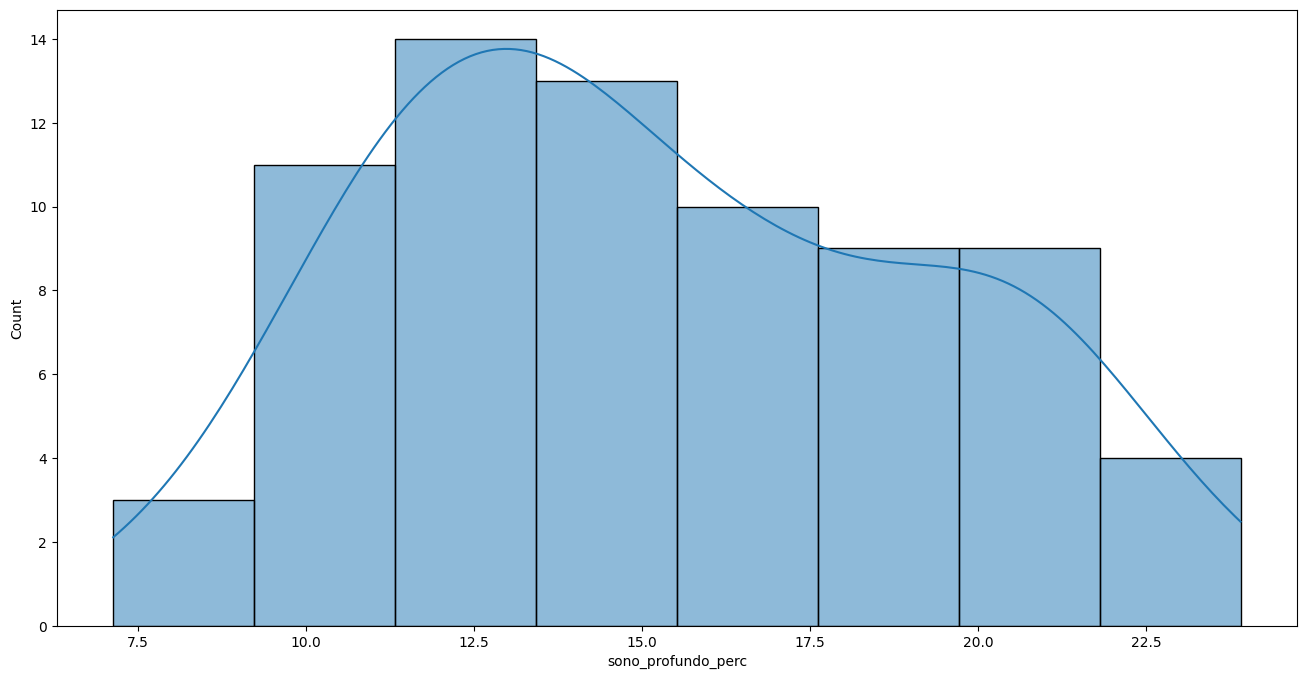

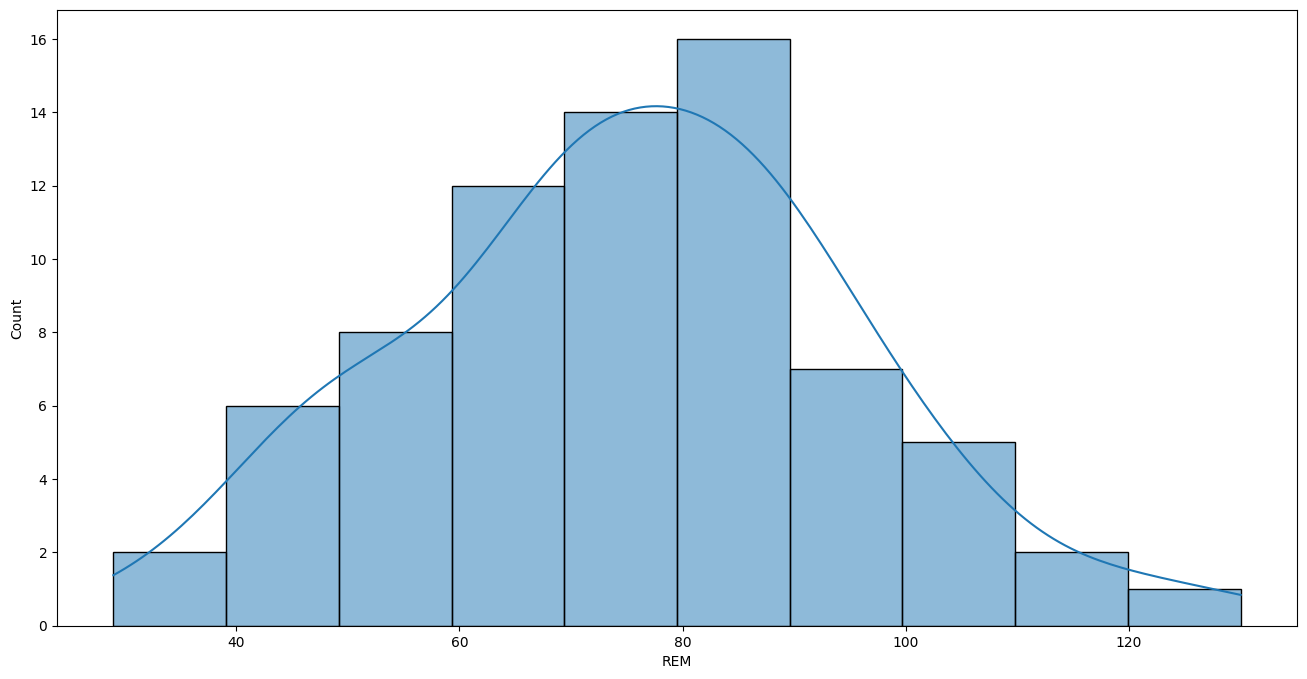

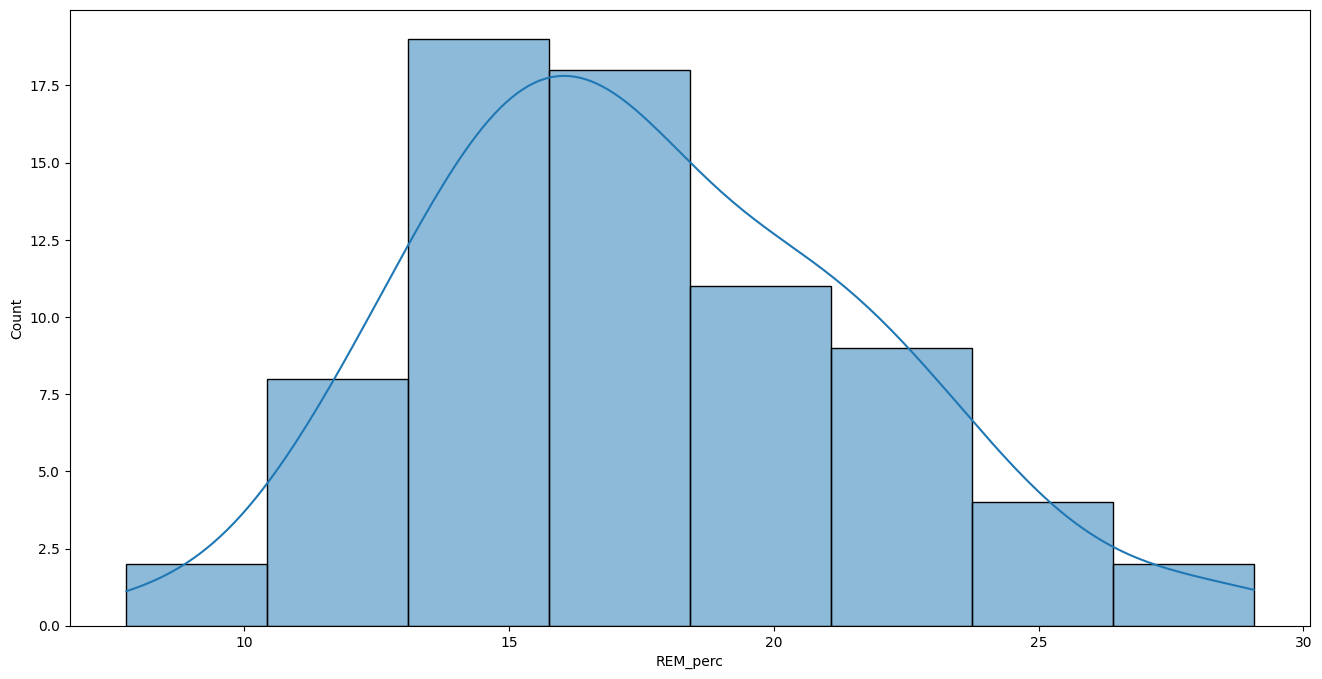

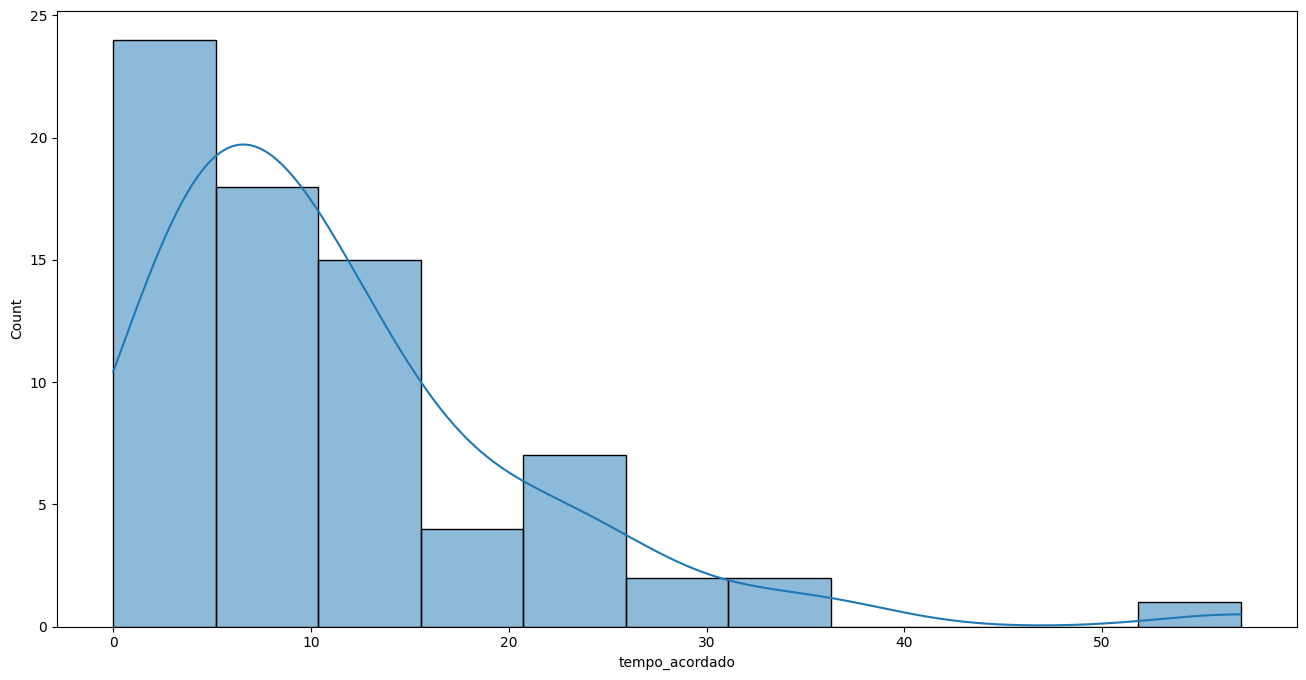

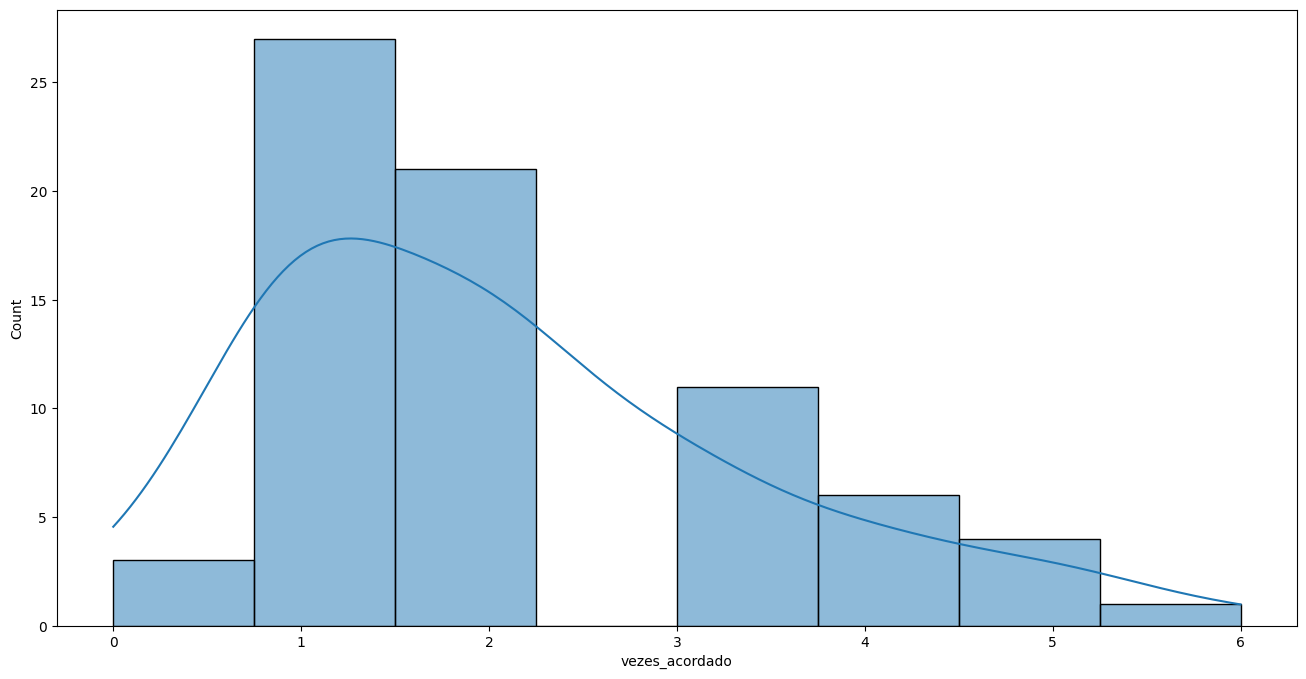

In [10]:
for metrica in metricas:
  plt.figure(figsize=(16, 8))
  sns.histplot(data=data, x=metrica, kde=True)

In [11]:
media_pontuacao = data["pontuacao"].mean()
media_pontuacao

np.float64(79.71232876712328)

Visualização geral de Pontuação e linha de média

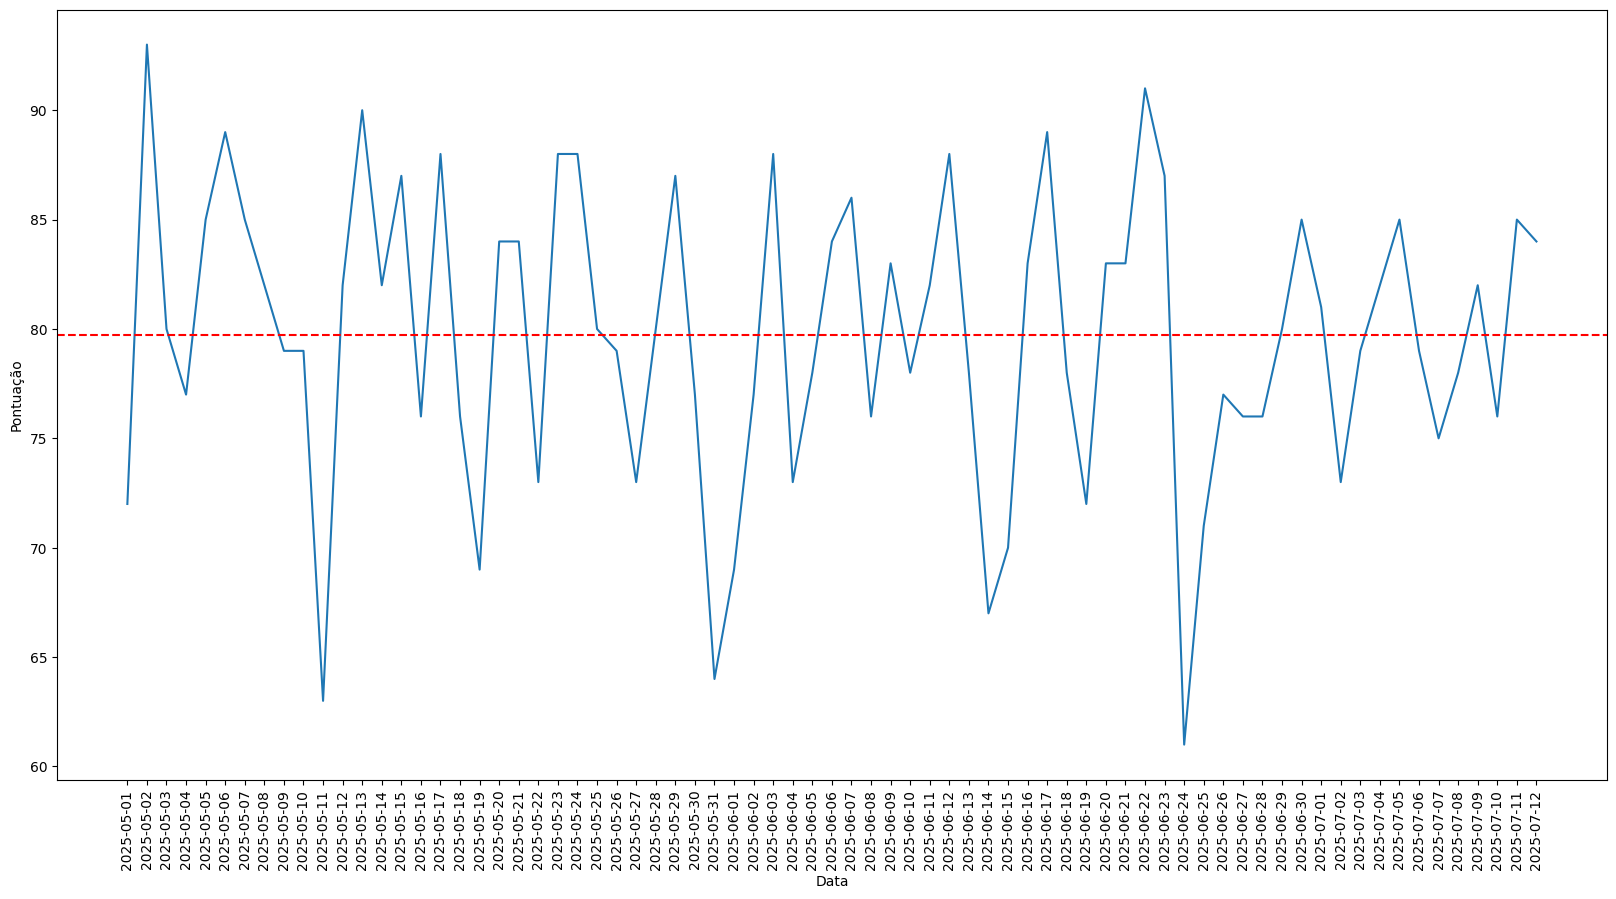

In [12]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x="data", y="pontuacao")
plt.axhline(media_pontuacao, color="red", linestyle="--")
plt.ylabel("Pontuação")
plt.xticks(rotation=90)
plt.xlabel("Data")
plt.show()

Gráfico de Correlação

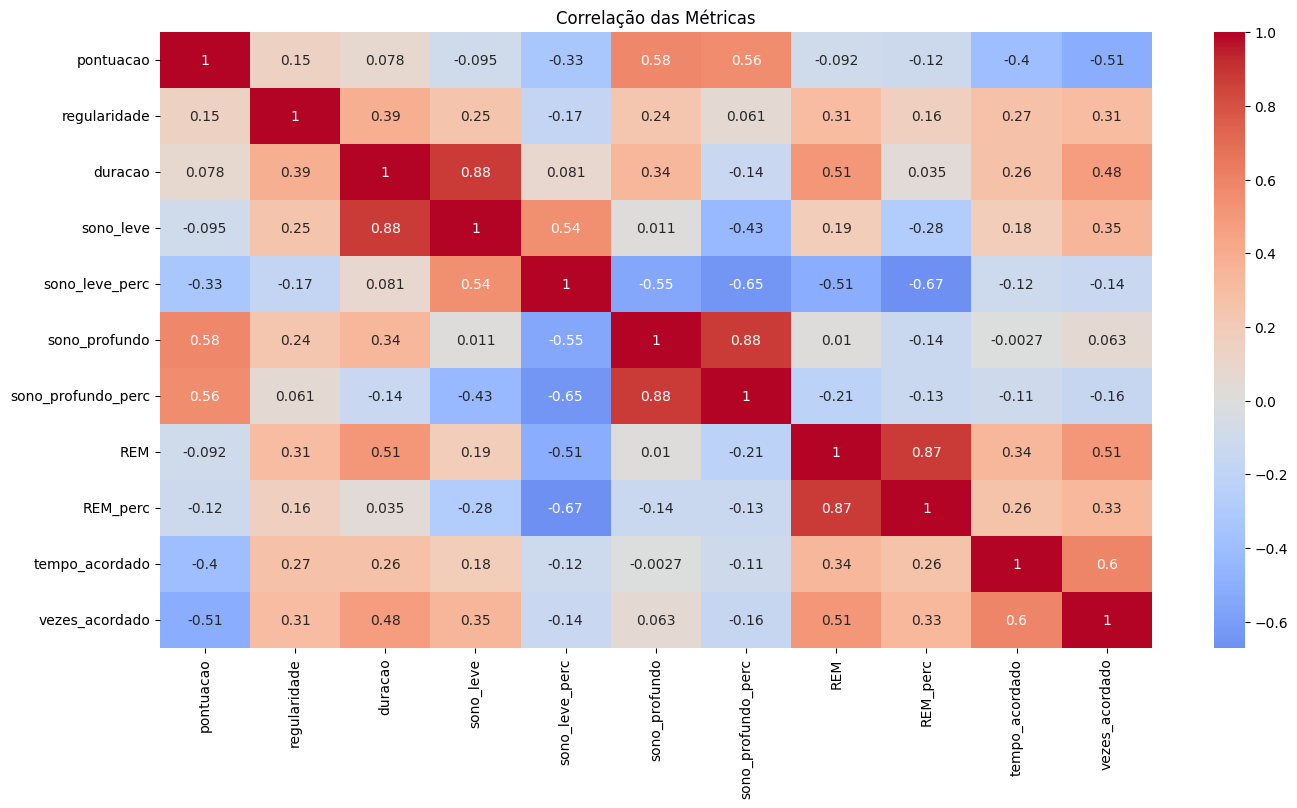

In [13]:
plt.figure(figsize=(16, 8))
sns.heatmap(data[metricas].corr(),  annot=True, cmap="coolwarm", center=0)
plt.title("Correlação das Métricas")
plt.show()

Utilização de Bar Plot (Stacked) para visualizar como está composta a duração do sono 

In [14]:
composicao_sono = ["sono_leve", "sono_profundo", "REM"]

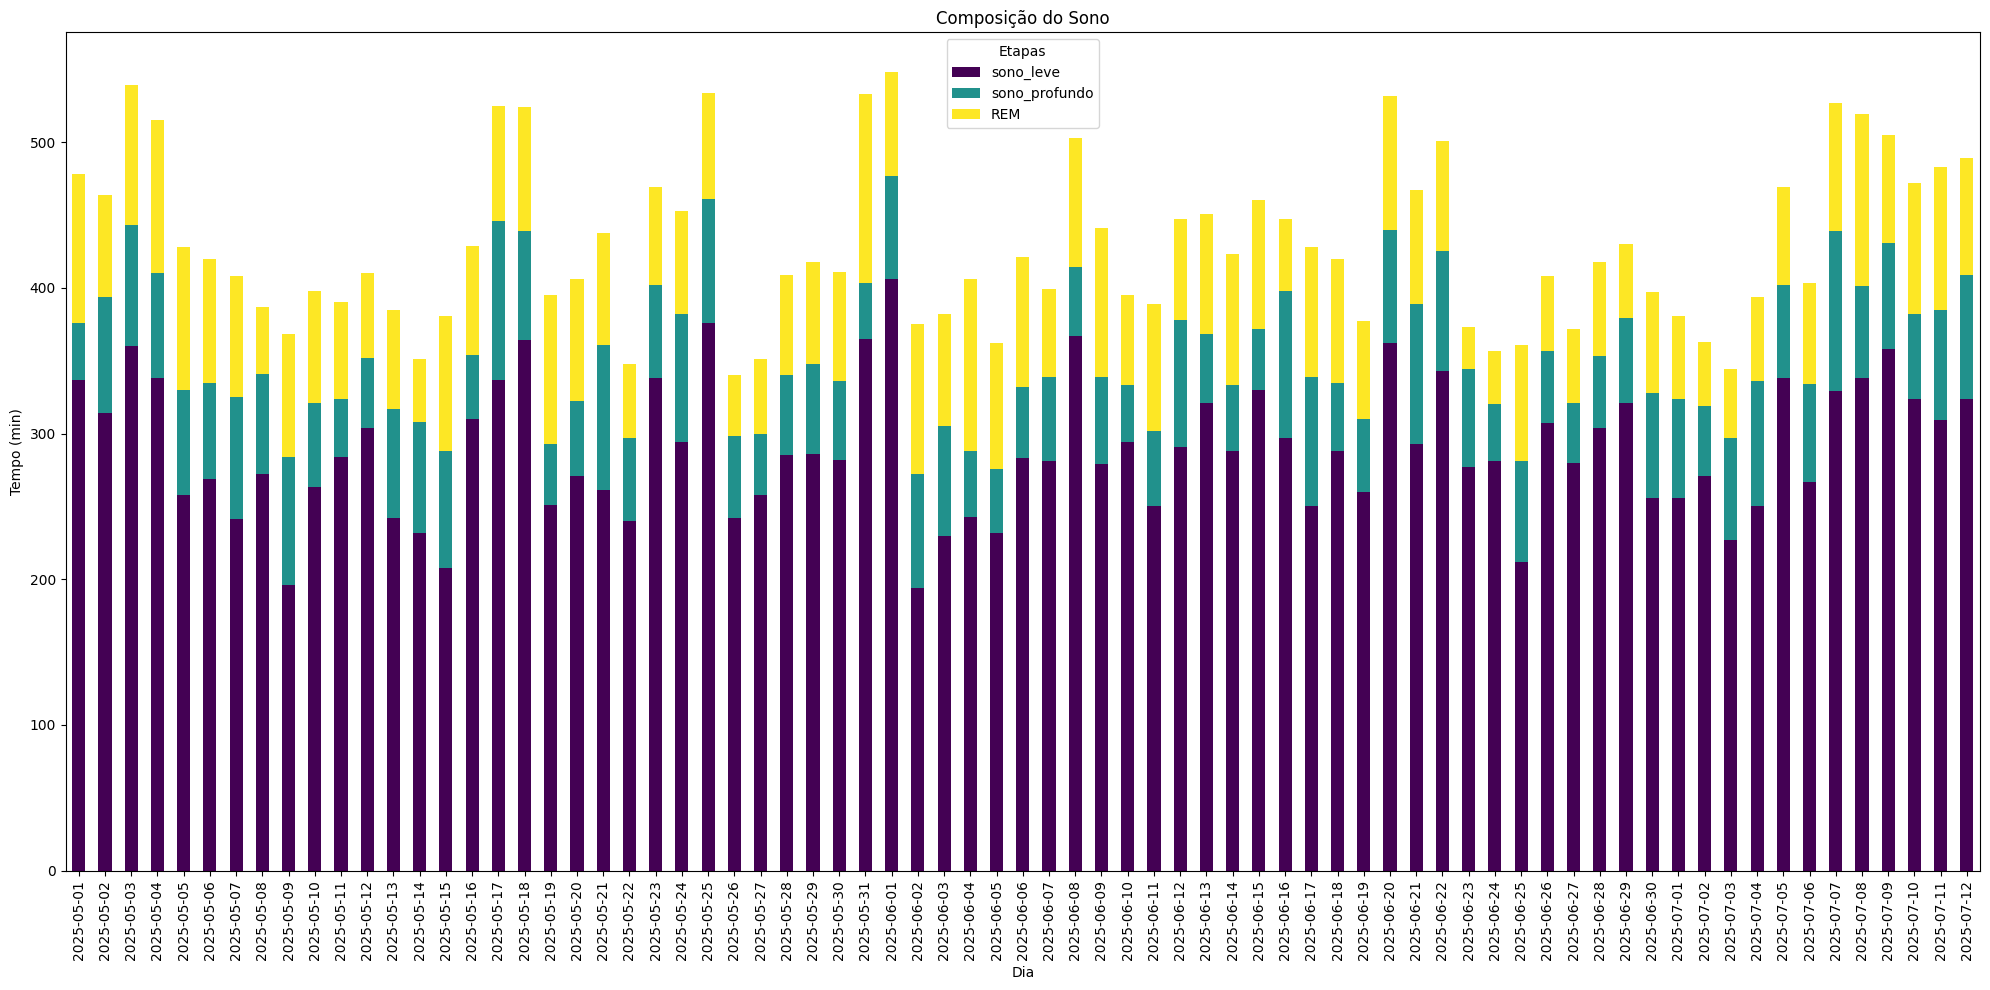

In [15]:
criar_barplot_stacked(dataframe=data, composicao_sono=composicao_sono)

In [16]:
total_sono = data[["sono_leve", "sono_profundo", "REM"]].sum()
labels = total_sono.index.tolist()
values = total_sono.values.tolist()

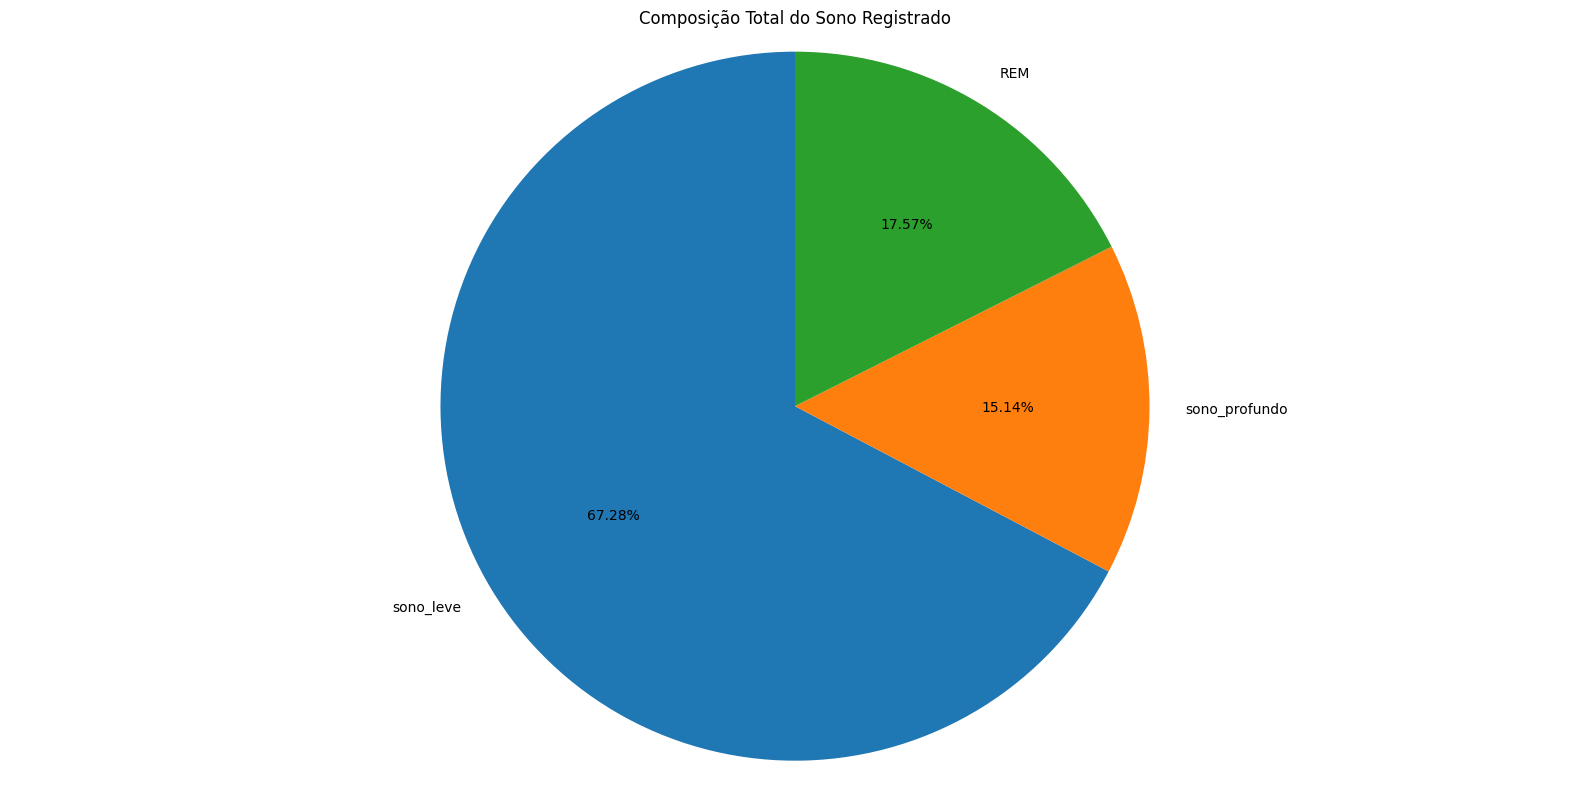

In [17]:
criar_pieplot(dataframe=data, values=values, labels=labels)

In [18]:
ordem = ["segunda-feira", "terça-feira", "quarta-feira", "quinta-feira", "sexta-feira",
         "sábado", "domingo"]

In [19]:
data_semana = data.copy()

In [20]:
data_semana["dia_semana"] = pd.Categorical(data_semana["dia_semana"], categories=ordem, ordered=True)

In [21]:
medias = data_semana.groupby("dia_semana")["pontuacao"].mean().round(2)

/tmp/ipykernel_22395/2131069414.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = data_semana.groupby("dia_semana")["pontuacao"].mean().round(2)


In [22]:
medias_df = medias.reset_index()
medias_df.columns = ["dia_semana", "pontuacao"]

In [23]:
medias_df = medias_df.sort_values("pontuacao", ascending=True)

In [24]:
medias_df

,dia_semana,pontuacao
6,domingo,76.10
2,quarta-feira,79.00
3,quinta-feira,79.18
5,sábado,80.00
0,segunda-feira,80.50
1,terça-feira,81.10
4,sexta-feira,81.91


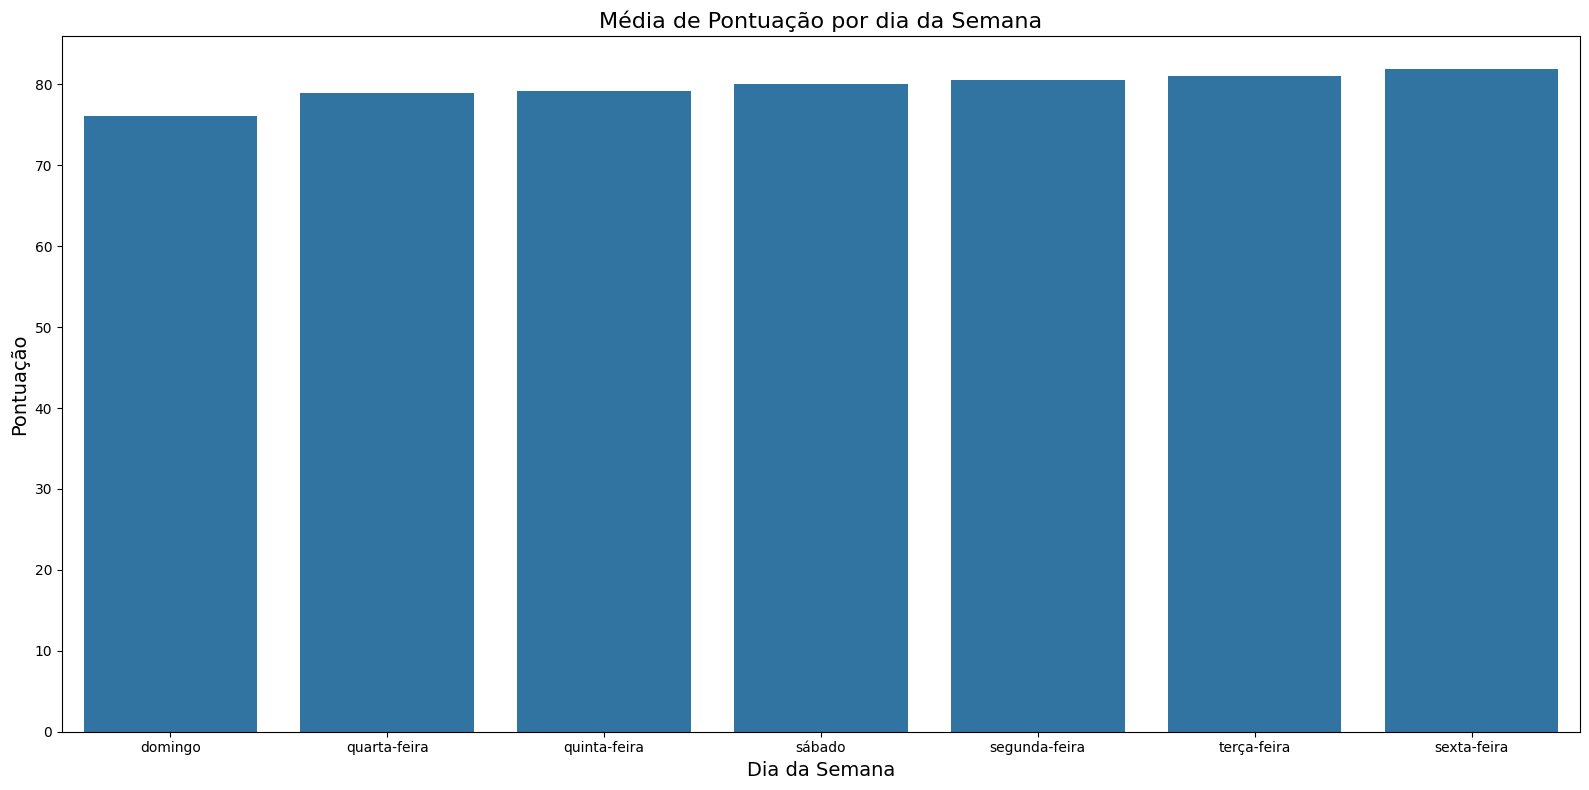

In [25]:
plt.figure(figsize=(16, 8))
sns.barplot(data=medias_df, x="dia_semana", y="pontuacao", order=medias_df["dia_semana"])
plt.title("Média de Pontuação por dia da Semana", size=16)
plt.xlabel("Dia da Semana", size=14)
plt.ylabel("Pontuação", size=14)
plt.tight_layout()
plt.show()

In [27]:
data_ordenado = data.sort_values(by="pontuacao", ascending=False)
maiores = data_ordenado.head(15)
menores = data_ordenado.tail(15)

In [28]:
maiores_dias_semana = maiores["dia_semana"].value_counts()
maiores_dias_semana

dia_semana
terça-feira      4
sexta-feira      3
quinta-feira     3
sábado           3
domingo          1
segunda-feira    1
Name: count, dtype: int64

In [29]:
menores_dias_semana = menores["dia_semana"].value_counts()
menores_dias_semana

dia_semana
quarta-feira     3
quinta-feira     3
domingo          3
segunda-feira    2
terça-feira      2
sábado           2
Name: count, dtype: int64

In [30]:
maiores

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
1,2025-05-02,sexta-feira,93,90,464,314,67.67,80,17.24,70,15.09,6,1
52,2025-06-22,domingo,91,80,501,343,68.46,82,16.37,76,15.17,11,1
12,2025-05-13,terça-feira,90,75,385,242,62.86,75,19.48,68,17.66,0,0
5,2025-05-06,terça-feira,89,88,420,269,64.05,66,15.71,85,20.24,8,2
47,2025-06-17,terça-feira,89,74,428,250,58.41,89,20.79,89,20.79,4,1
16,2025-05-17,sábado,88,88,525,337,64.19,109,20.76,79,15.05,9,2
22,2025-05-23,sexta-feira,88,76,469,338,72.07,64,13.65,67,14.29,3,1
42,2025-06-12,quinta-feira,88,85,447,291,65.10,87,19.46,69,15.44,8,2
33,2025-06-03,terça-feira,88,79,382,230,60.21,75,19.63,77,20.16,7,1
23,2025-05-24,sábado,88,78,453,294,64.90,88,19.43,71,15.67,13,2


In [36]:
menores

,data,dia_semana,pontuacao,regularidade,duracao,sono_leve,sono_leve_perc,sono_profundo,sono_profundo_perc,REM,REM_perc,tempo_acordado,vezes_acordado
67,2025-07-07,segunda-feira,75,79,527,329,62.43,110,20.87,88,16.70,13,3
34,2025-06-04,quarta-feira,73,80,406,243,59.85,45,11.08,118,29.06,13,5
62,2025-07-02,quarta-feira,73,77,363,271,74.66,48,13.22,44,12.12,4,1
26,2025-05-27,terça-feira,73,71,351,258,73.50,42,11.97,51,14.53,1,1
21,2025-05-22,quinta-feira,73,77,348,240,68.97,57,16.38,51,14.66,11,2
0,2025-05-01,quinta-feira,72,90,478,337,70.50,39,8.16,102,21.34,6,3
49,2025-06-19,quinta-feira,72,71,377,260,68.97,50,13.26,67,17.77,7,2
55,2025-06-25,quarta-feira,71,71,361,212,58.73,69,19.11,80,22.16,35,2
45,2025-06-15,domingo,70,77,460,330,71.74,42,9.13,88,19.13,22,4
18,2025-05-19,segunda-feira,69,84,395,251,63.54,42,10.63,102,25.82,15,4


In [51]:
media_maiores_df = maiores[["pontuacao", "duracao", "sono_leve_perc", "sono_profundo_perc", "REM_perc", "tempo_acordado", "vezes_acordado"]].mean().round(2)

In [52]:
media_maiores_df

pontuacao              88.27
duracao               435.20
sono_leve_perc         65.31
sono_profundo_perc     17.77
REM_perc               16.92
tempo_acordado          6.93
vezes_acordado          1.27
dtype: float64

In [53]:
media_menores_df = menores[["pontuacao", "duracao", "sono_leve_perc", "sono_profundo_perc", "REM_perc", "tempo_acordado", "vezes_acordado"]].mean().round(2)

In [54]:
media_menores_df

pontuacao              69.67
duracao               421.13
sono_leve_perc         69.01
sono_profundo_perc     12.38
REM_perc               18.61
tempo_acordado         18.47
vezes_acordado          3.20
dtype: float64

In [56]:
print("Média das Maiores 15 Pontuações registradas")
print("-------------------------------------------")
print(f"Pontuação: {media_maiores_df["pontuacao"]}")
print(f"Duração: {media_maiores_df["duracao"]}")
print(f"Sono Leve %: {media_maiores_df["sono_leve_perc"]}")
print(f"Sono Profundo %: {media_maiores_df["sono_profundo_perc"]}")
print(f"REM %: {media_maiores_df["REM_perc"]}")
print(f"Tempo acordado: {media_maiores_df["tempo_acordado"]}")
print(f"Vezes acordado: {media_maiores_df["vezes_acordado"]}")


Média das Maiores 15 Pontuações registradas
-------------------------------------------
Pontuação: 88.27
Duração: 435.2
Sono Leve %: 65.31
Sono Profundo %: 17.77
REM %: 16.92
Tempo acordado: 6.93
Vezes acordado: 1.27


In [ ]:
print("Média das Menores 15 Pontuações registradas")
print("-------------------------------------------")
print(f"Pontuação: {media_maiores_df["pontuacao"]}")
print(f"Duração: {media_maiores_df["duracao"]}")
print(f"Sono Leve %: {media_maiores_df["sono_leve_perc"]}")
print(f"Sono Profundo %: {media_maiores_df["sono_profundo_perc"]}")
print(f"REM %: {media_maiores_df["REM_perc"]}")
print(f"Tempo acordado: {media_maiores_df["tempo_acordado"]}")
print(f"Vezes acordado: {media_maiores_df["vezes_acordado"]}")


Média das Menores 15 Pontuações registradas
-------------------------------------------
Pontuação: 69.67
Duração: 421.13
Sono Leve (%): 69.01
Sono Profundo (%): 12.38
REM (%): 18.61
Tempo acordado: 18.47
Vezes acordado: 3.2
-------------------------------------------


In [57]:
print("Diferença entre as Maiores e Menores")
print("--------------------------------")
print(f"Pontuação: {media_maiores_df["pontuacao"] - media_menores_df["pontuacao"]:.2f}")
print(f"Duração: {media_maiores_df["duracao"] - media_menores_df["duracao"]:.2f}")
print(f"Sono Leve (%): {media_maiores_df["sono_leve_perc"] - media_menores_df["sono_leve_perc"]:.2f}")
print(f"Sono Profundo (%): {media_maiores_df["sono_profundo_perc"] - media_menores_df["sono_profundo_perc"]:.2f}")
print(f"REM (%): {media_maiores_df["REM_perc"] - media_menores_df["REM_perc"]:.2f}")
print(f"Tempo acordado: {media_maiores_df["tempo_acordado"] - media_menores_df["tempo_acordado"]:.2f}")
print(f"Vezes acordado: {media_maiores_df["vezes_acordado"] - media_menores_df["vezes_acordado"]:.2f}")
print("--------------------------------")

Diferença entre as Maiores e Menores
--------------------------------
Pontuação: 18.60
Duração: 14.07
Sono Leve (%): -3.70
Sono Profundo (%): 5.39
REM (%): -1.69
Tempo acordado: -11.54
Vezes acordado: -1.93
--------------------------------


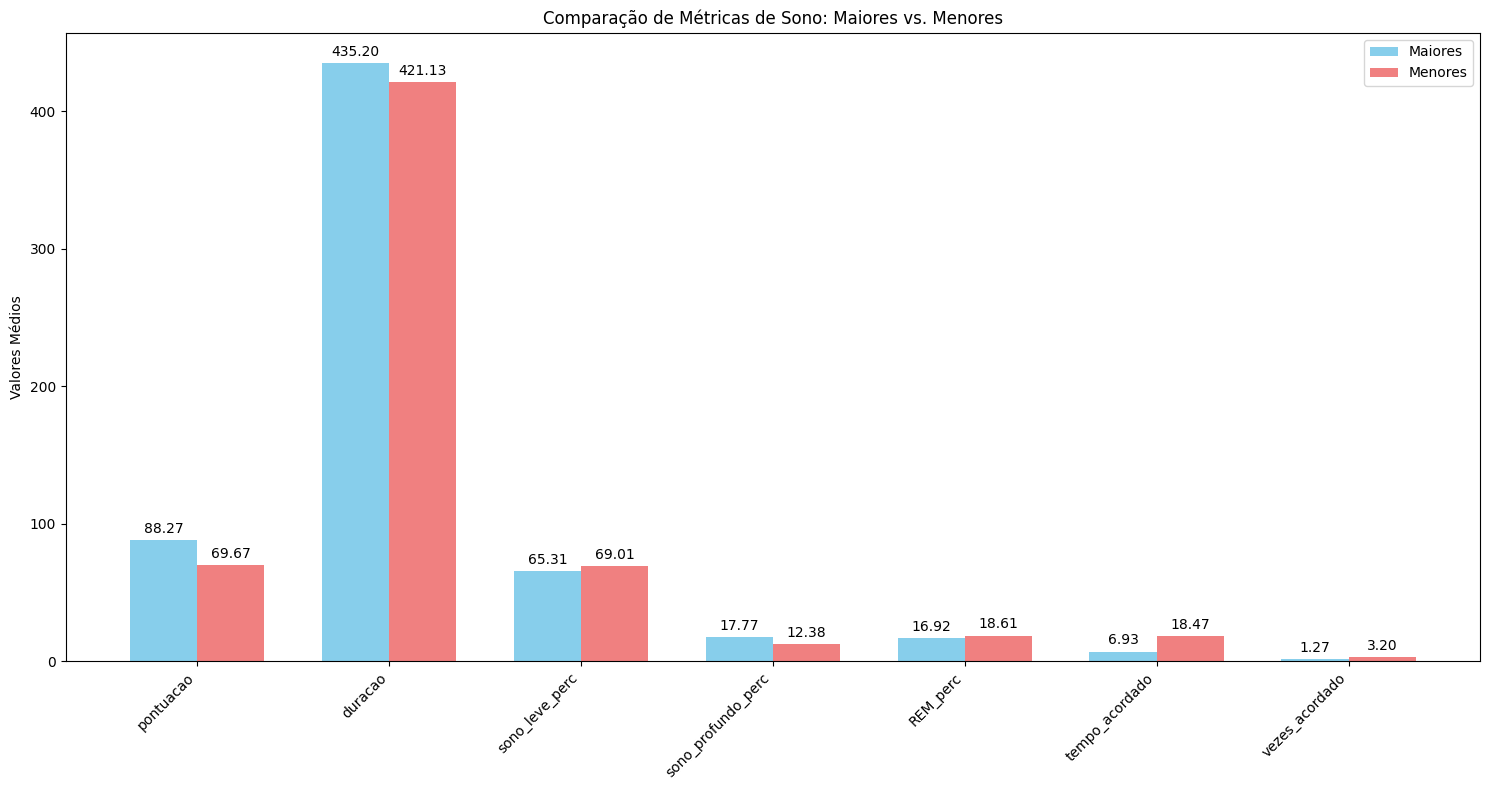

In [61]:
categorias = media_maiores_df.index.tolist()
maiores_vals = media_maiores_df.values
menores_vals = media_menores_df.values

x = np.arange(len(categorias))  
width = 0.35 


fig, ax = plt.subplots(figsize=(15, 8))
bars1 = ax.bar(x - width/2, maiores_vals, width, label='Maiores', color='skyblue')
bars2 = ax.bar(x + width/2, menores_vals, width, label='Menores', color='lightcoral')

ax.set_ylabel('Valores Médios')
ax.set_title('Comparação de Métricas de Sono: Maiores vs. Menores')
ax.set_xticks(x)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend()

ax.bar_label(bars1, padding=3, fmt='%.2f')
ax.bar_label(bars2, padding=3, fmt='%.2f')

plt.tight_layout()
plt.show()